## 의사결정 모델과 과대적합 (overfitting)

    - 규칙을 바탕으로 균일한 데이터 분류 => 규칙 복잡 => 과대적합 가능성 높음

In [18]:
# 모듈 로딩-------------------------------------------------------------------------------------

from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

---
### 샘플용 데이터 생성


In [8]:
x, y = make_classification(n_samples=120,
                           n_features=2,
                           n_classes=3,
                           n_informative=2, 
                           n_redundant=0,
                           n_repeated=0,
                           n_clusters_per_class=1)

#필수 입력사항 : Number of informative, redundant and repeated features

In [9]:
x.shape, y.shape

((120, 2), (120,))

In [10]:
x[:5] , y[:5]

(array([[ 0.85804724, -0.09157988],
        [ 1.15673722, -0.18497008],
        [-0.7612241 ,  1.14232383],
        [ 1.30913598, -1.01447148],
        [ 0.60419777,  3.05179113]]),
 array([1, 1, 0, 1, 2]))

### 데이터 분포 확인


In [16]:
x1 = np.round((x[:,0]),2)
x2= np.round((x[:,1]),2)

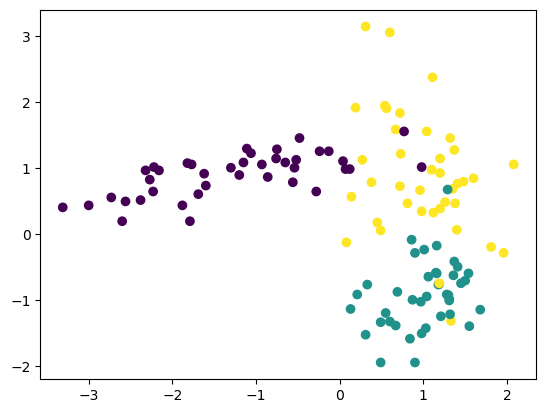

In [17]:
plt.scatter(x1,x2,c=y)

## 분류 : DT 

In [26]:
x_train,x_test, y_train,y_test=train_test_split(x,y, random_state=11)

x_train.shape, y_train.shape, x_test.shape

((90, 2), (90,), (30, 2))

## 모델 생성

In [28]:
model=DecisionTreeClassifier()
model.fit(x_train, y_train)


DecisionTreeClassifier()

In [30]:
model.score(x_train, y_train)

1.0

In [33]:
model.score(x_test, y_test)

0.8666666666666667

In [34]:
### 사용자 정의 함수 : 과대적합 상황을 시각화

import numpy as np

# Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
    
    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3) #zorder:순서
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    
    # 호출 파라미터로 들어온 training 데이타로 model 학습 . 
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행. : 2차원 좌표로 만들어줌  
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    #np.linspace : 동일간격 점 찍어줌 
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
                            #1차원으로 펴줌 
    
    # contourf() 를 이용하여 class boundary 를 visualization 수행. 
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)

C:\Users\user\AppData\Local\Temp\ipykernel_2248\14467667.py:25: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3,


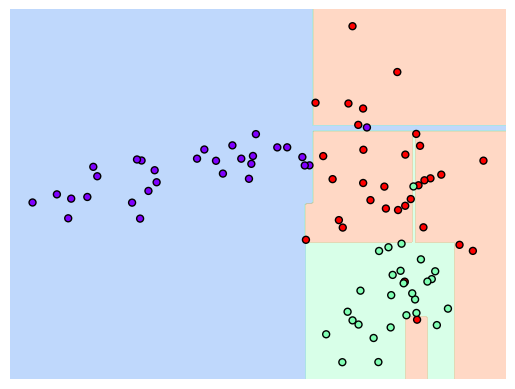

In [35]:
visualize_boundary(model, x_train,y_train)

C:\Users\user\AppData\Local\Temp\ipykernel_2248\14467667.py:25: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3,


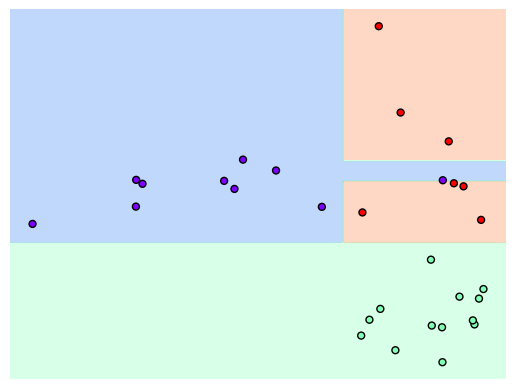

In [36]:
visualize_boundary(model, x_test,y_test)

C:\Users\user\AppData\Local\Temp\ipykernel_2248\14467667.py:25: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3,


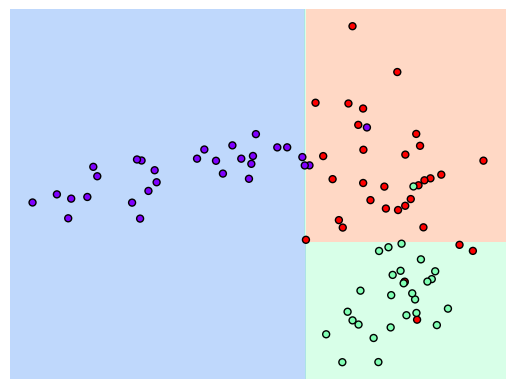

In [37]:
model=DecisionTreeClassifier(max_depth=2)
model.fit(x_train, y_train)

visualize_boundary(model, x_train,y_train)

C:\Users\user\AppData\Local\Temp\ipykernel_2248\14467667.py:25: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3,


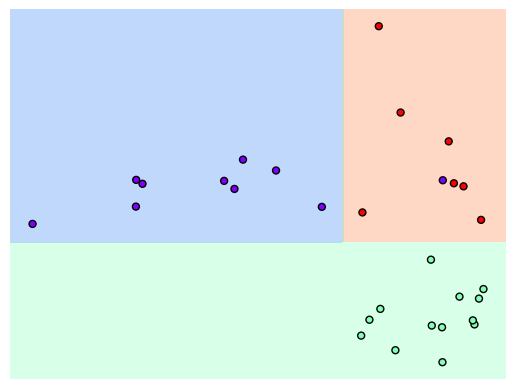

In [38]:
visualize_boundary(model, x_test,y_test)

C:\Users\user\AppData\Local\Temp\ipykernel_2248\14467667.py:25: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3,
C:\Users\user\AppData\Local\Temp\ipykernel_2248\14467667.py:25: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3,


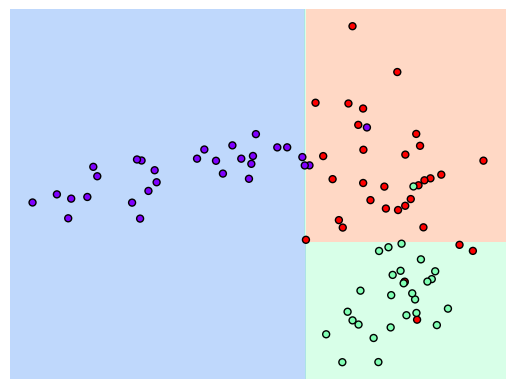

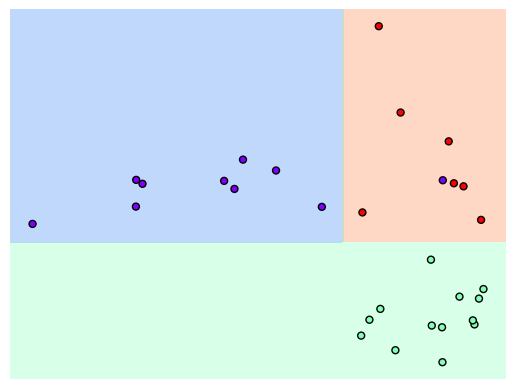

In [39]:
model=DecisionTreeClassifier(min_samples_split=10, min_samples_leaf=5)
model.fit(x_train, y_train)

visualize_boundary(model, x_train,y_train)
visualize_boundary(model, x_test,y_test)
